In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
# Load the dataset_1
df = pd.read_csv("dataset_1.csv" )

In [3]:
# Separate feature and target
X = df.drop(['ROP_AVG'], axis=1)
y = df['ROP_AVG']

In [4]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Define models
models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=10),
    'Random Forest': RandomForestRegressor(random_state=10),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(random_state=10, use_label_encoder=False, eval_metric='rmse'),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=10)
}

In [5]:
# Define parameter grids
param_grids = {
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 10],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, 20],
        'model__min_samples_split': [2, 4, 6]
    },
    'Support Vector Machine': {
        'model__C': [0.1, 1, 10],
        'model__epsilon': [0.01, 0.1, 1],
        'model__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 10],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'CatBoost': {
        'model__iterations': [100, 500, 1000],
        'model__depth': [6, 8, 10],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }
}

In [6]:
# Evaluate each model with GridSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Create pipeline
    steps = [('scaler', StandardScaler()), ('model', model)]
    pipe = Pipeline(steps)

    # Define GridSearchCV
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    # Fit GridSearchCV to training data
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_

    # Print the best parameters
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'model__max_depth': 5, 'model__min_samples_split': 4, 'model__n_estimators': 100}
Tuning hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Support Vector Machine: {'model__C': 0.1, 'model__epsilon': 1, 'model__kernel': 'linear'}
Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:14:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Tuning hyperparameters for CatBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for CatBoost: {'model__depth': 8, 'model__iterations': 100, 'model__learning_rate': 0.1}



Model: Gradient Boosting
R2: 0.75
RMSE: 0.0007
MAE: 0.0005

Model: Random Forest
R2: 0.72
RMSE: 0.0007
MAE: 0.0005

Model: Support Vector Machine
R2: -0.98
RMSE: 0.0019
MAE: 0.0017

Model: XGBoost
R2: 0.80
RMSE: 0.0006
MAE: 0.0005

Model: CatBoost
R2: 0.66
RMSE: 0.0008
MAE: 0.0006


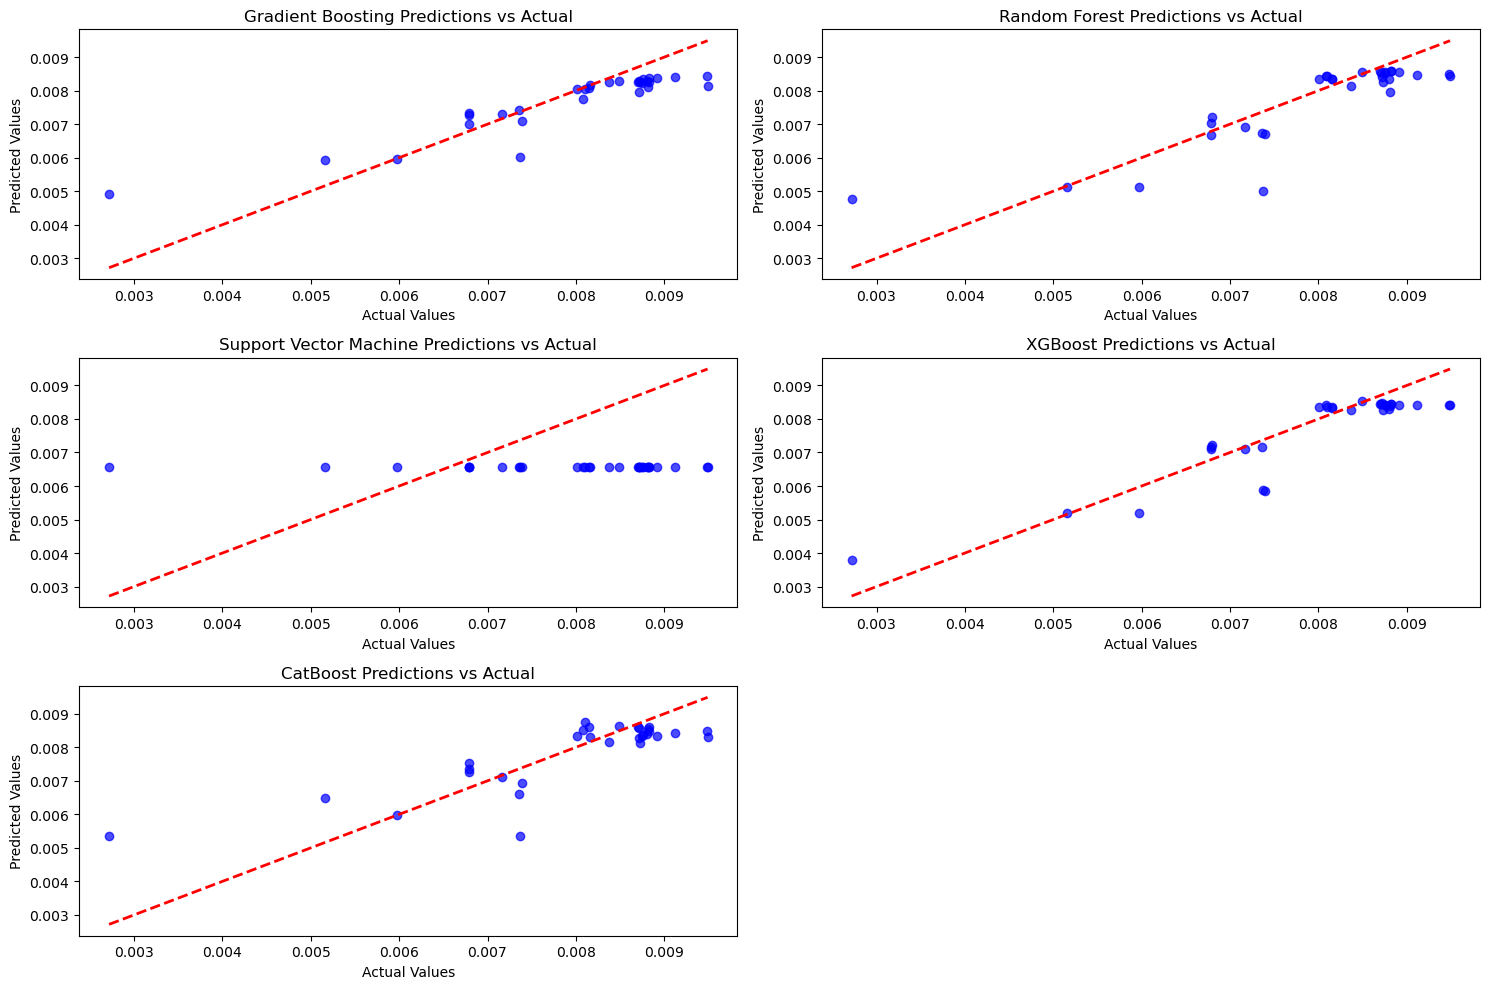

In [7]:
# Evaluate and plot predictions for each model
plt.figure(figsize=(15, 10))
for i, (model_name, model) in enumerate(best_models.items(), start=1):
    # Predictions
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    r2 = model.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)

    print(f"\nModel: {model_name}")
    print(f"R2: {r2:.2f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Plot predictions vs real data
    plt.subplot(3, 2, i)
    plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'{model_name} Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()